In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [52]:
listings = pd.read_csv('Exercise Files/ChickWeight.csv')

In [53]:
listings.columns

Index(['Unnamed: 0', 'weight', 'Time', 'Chick', 'Diet'], dtype='object')

In [54]:
listings['Diet'].unique()

array([1, 2, 3, 4])

In [55]:
diet_1 = listings.loc[listings['Diet'] == 1]
diet_2 = listings.loc[listings['Diet'] == 2]

In [56]:
diet_1

,Unnamed: 0,weight,Time,Chick,Diet
0,1,42,0,1,1
1,2,51,2,1,1
2,3,59,4,1,1
3,4,64,6,1,1
4,5,76,8,1,1
...,...,...,...,...,...
215,216,89,14,20,1
216,217,98,16,20,1
217,218,107,18,20,1
218,219,115,20,20,1


In [57]:
diet_2

,Unnamed: 0,weight,Time,Chick,Diet
220,221,40,0,21,2
221,222,50,2,21,2
222,223,62,4,21,2
223,224,86,6,21,2
224,225,125,8,21,2
...,...,...,...,...,...
335,336,122,14,30,2
336,337,143,16,30,2
337,338,151,18,30,2
338,339,157,20,30,2


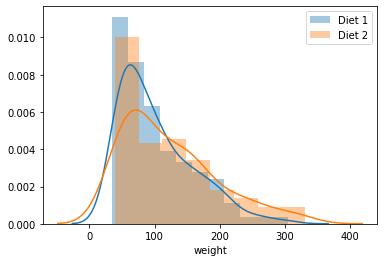

In [58]:
sn.distplot(diet_1['weight'], kde = True, label = 'Diet 1')
sn.distplot(diet_2['weight'], kde = True, label = 'Diet 2')

plt.legend()
plt.show()

In [60]:
observed_test_stat = np.mean(diet_1['weight']) - np.mean(diet_2['weight'])

In [61]:
observed_test_stat

-19.97121212121212

In [40]:
diet_1['weight'].sample(frac = 1)

37      49
118    124
9      171
151     71
3       64
      ... 
140    185
17     103
113     89
119     43
209     47
Name: weight, Length: 220, dtype: int64

In [41]:
diet_1['weight'].sample(frac = 1).reset_index()

,index,weight
0,122,84
1,96,51
2,38,56
3,182,42
4,41,87
...,...,...
215,79,174
216,7,125
217,51,60
218,149,71


In [42]:
diet_1['weight'].sample(frac = 1).reset_index(drop = True)

0      181
1      138
2      197
3      220
4       70
      ... 
215     89
216    134
217     51
218     56
219     40
Name: weight, Length: 220, dtype: int64

In [43]:
def perm (data):
    return data.sample(frac = 1).reset_index(drop = True)

In [62]:
sim_test_stat = np.array([])

reps = 10000

for i in range(reps):
    perm_info = perm(listings['weight'])
    
    df = pd.DataFrame({'Permuted Duration': perm_info, 'Diet': listings['Diet']})
    
    diet_1 = df.loc[df['Diet'] == 1, 'Permuted Duration']
    diet_2 = df.loc[df['Diet'] == 2, 'Permuted Duration']
    
    stat = np.mean(diet_1) - np.mean(diet_2) 
    
    sim_test_stat = np.append(sim_test_stat, stat)

In [63]:
sim_test_stat

array([-2.77348485,  4.46666667,  3.23560606, ..., -2.88560606,
        2.87727273, -3.75606061])

In [65]:
p_value = np.count_nonzero(sim_test_stat <= observed_test_stat) / reps

In [66]:
p_value

0.0075